In [25]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import pandas as pd
from datetime import date

#import csv
df = pd.read_csv("JOCO_Median_Prices.csv")

#convert date to date data type
periodbg_unformatted = df['period_begin']
periodend_unformatted = df['period_end']
periodbg_formatted = pd.to_datetime(periodbg_unformatted, format='%m/%d/%Y')
periodend_formatted = pd.to_datetime(periodend_unformatted, format='%m/%d/%Y')
df['period_begin'] = periodbg_formatted
df['period_end'] = periodend_formatted

#only include single family homes since 2018
df_2018 = df.loc[(df['property_type'] =='Single Family Residential') & (df['period_begin'] >='2018-01-01')]


#sort dates
sorted_df_2018 = df_2018.sort_values(by='period_begin')
sorted_df_2018

,period_begin,period_end,property_type,median_sale_price,median_list_price,homes_sold,new_listings,months_of_supply,price_drops
264,2018-01-01,2018-01-31,Single Family Residential,280000.0,276250.0,519.0,664.0,3.1,0.153080
457,2018-02-01,2018-02-28,Single Family Residential,280000.0,299550.0,531.0,761.0,3.0,0.133292
193,2018-03-01,2018-03-31,Single Family Residential,291000.0,299500.0,759.0,1255.0,2.5,0.165962
284,2018-04-01,2018-04-30,Single Family Residential,297000.0,303250.0,856.0,1285.0,2.4,0.191602
117,2018-05-01,2018-05-31,Single Family Residential,300000.0,297750.0,1129.0,1309.0,2.0,0.244971
...,...,...,...,...,...,...,...,...,...
488,2022-11-01,2022-11-30,Single Family Residential,435000.0,390000.0,576.0,429.0,2.1,0.234702
376,2022-12-01,2022-12-31,Single Family Residential,425000.0,400000.0,567.0,331.0,1.9,0.132776
54,2023-01-01,2023-01-31,Single Family Residential,405000.0,425000.0,385.0,495.0,2.7,0.121622
584,2023-02-01,2023-02-28,Single Family Residential,414513.0,415000.0,441.0,513.0,2.4,0.098659


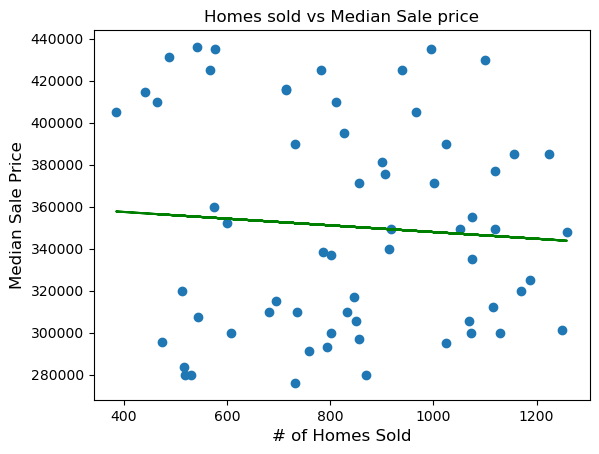

In [38]:
#x/y values
x_values = sorted_df_2018['homes_sold']
y_values = sorted_df_2018['median_sale_price']

#correlations and statistics
corr=round(st.pearsonr(sorted_df_2018['homes_sold'],sorted_df_2018['median_sale_price'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.xlabel('# of Homes Sold', fontsize = 12)
plt.ylabel('Median Sale Price', fontsize = 12)
plt.title('Homes sold vs Median Sale price')
plt.show()

In [28]:
# correlation and p value
r_value = st.pearsonr(sorted_df_2018['homes_sold'], sorted_df_2018['median_list_price'])
print(r_value)

PearsonRResult(statistic=-0.2746575495292085, pvalue=0.029372192659100172)


Text(0, 0.5, '# of Homes Sold')

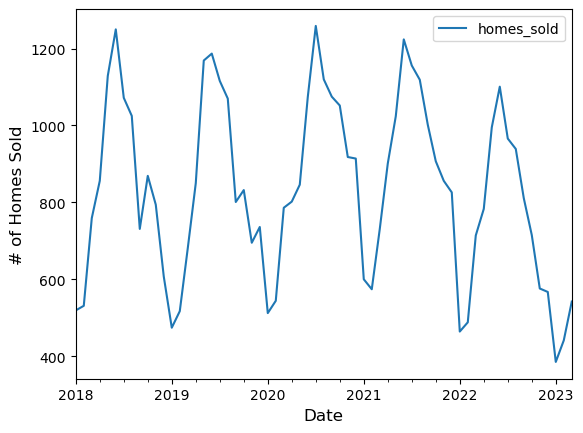

In [40]:
#x/y values
sorted_df_2018.plot.line('period_begin','homes_sold')
x_axis = sorted_df_2018['period_begin']
y_axis = sorted_df_2018['homes_sold']

#plotting
plt.plot(x_axis, y_axis)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('# of Homes Sold', fontsize = 12)

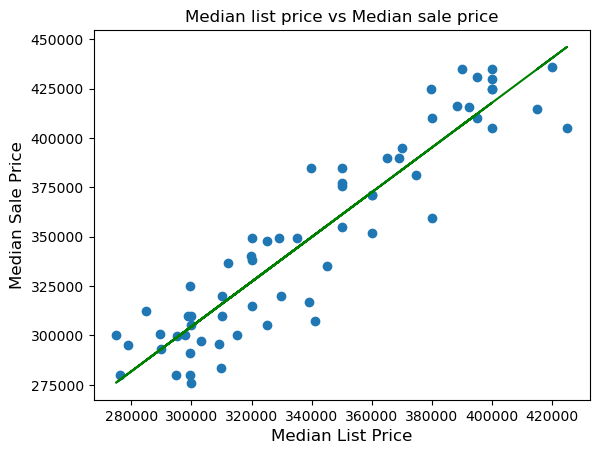

In [42]:
#x/y values
x_values = sorted_df_2018['median_list_price']
y_values = sorted_df_2018['median_sale_price']

#correlations and statistics
corr=round(st.pearsonr(sorted_df_2018['median_list_price'],sorted_df_2018['median_sale_price'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.xlabel('Median List Price', fontsize = 12)
plt.ylabel('Median Sale Price', fontsize = 12)
plt.title('Median list price vs Median sale price')
plt.show()

In [29]:
# correlation and p value
r_value = st.pearsonr(sorted_df_2018['median_sale_price'], sorted_df_2018['median_list_price'])
print(r_value)

PearsonRResult(statistic=0.9291487728275744, pvalue=4.759646260204723e-28)


Text(0, 0.5, 'Median List Price')

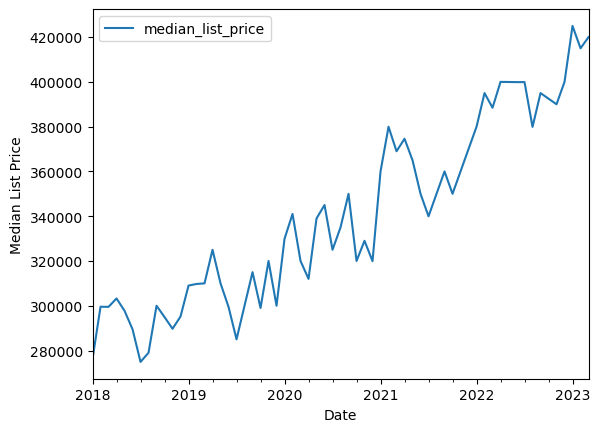

In [33]:
#x/y values
sorted_df_2018.plot.line('period_begin','median_list_price')
x_axis = sorted_df_2018['period_begin']
y_axis = sorted_df_2018['median_list_price']

#plotting
plt.plot(x_axis, y_axis)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Median List Price', fontsize = 12)

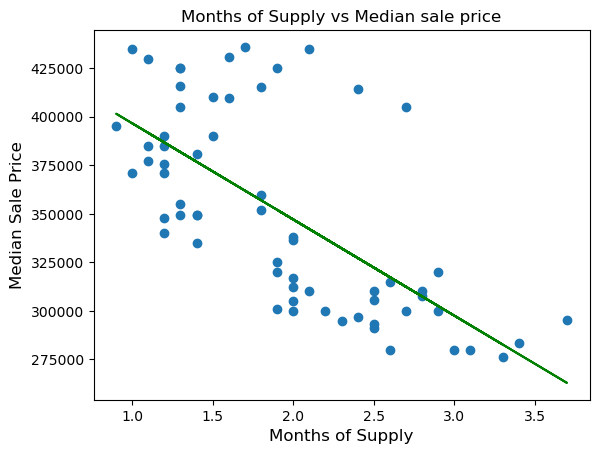

In [43]:
#x/y values
x_values = sorted_df_2018['months_of_supply']
y_values = sorted_df_2018['median_sale_price']

#correlations and statistics
corr=round(st.pearsonr(sorted_df_2018['months_of_supply'],sorted_df_2018['median_sale_price'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.xlabel('Months of Supply', fontsize = 12)
plt.ylabel('Median Sale Price', fontsize = 12)
plt.title('Months of Supply vs Median sale price')
plt.show()

In [30]:
# correlation and p value
r_value = st.pearsonr(sorted_df_2018['months_of_supply'], sorted_df_2018['median_list_price'])
print(r_value)

PearsonRResult(statistic=-0.4999703165267775, pvalue=3.0180662366121104e-05)


Text(0, 0.5, 'Months of Supply')

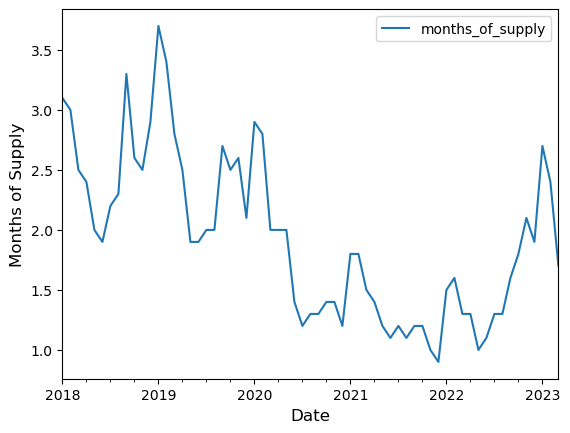

In [44]:
#x/y values
sorted_df_2018.plot.line('period_begin','months_of_supply')
x_axis = sorted_df_2018['period_begin']
y_axis = sorted_df_2018['months_of_supply']

#plotting
plt.plot(x_axis, y_axis)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Months of Supply', fontsize = 12)